In [39]:
import numpy as np
import geopandas as gpd
import pandas as pd
import requests
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [213]:
df = pd.read_csv('files/input/31304c.csv')

df.at[2, 'Provincia'] = 'Almería'
df.at[3, 'Provincia'] = 'Araba/Álava'
df.at[5, 'Provincia'] = 'Ávila'
df.at[11, 'Provincia'] = 'Cáceres'
df.at[12, 'Provincia'] = 'Cádiz'
df.at[14, 'Provincia'] = 'Castelló/Castellón'
df.at[16, 'Provincia'] = 'Córdoba'
df.at[17, 'Provincia'] = 'A Coruña'
df.at[25, 'Provincia'] = 'Jaén'
df.at[26, 'Provincia'] = 'León'
df.at[30, 'Provincia'] = 'Málaga'
df.at[46, 'Provincia'] = 'València/Valencia'

for i in range(len(df)):
    df.at[i, 'Habitantes'] = df.at[i, 'Habitantes'].replace(".", "")
df = df.astype({'Habitantes': 'float'})

provinciasGDF = gpd.read_file('files/input/recintos_provinciales_inspire_peninbal_etrs89.shp') 
mergeGDF = provinciasGDF.merge(df, left_on='NAMEUNIT', right_on='Provincia')

In [214]:
habitants_data = mergeGDF.Habitantes
X = np.column_stack(tuple(habitants_data)).reshape(-1, 1)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5,  max_iter=400)
y_kmeans = kmeans.fit_predict(X)
k = pd.DataFrame(y_kmeans, columns=['cluster'])
mergeGDF = mergeGDF.join(k)

In [222]:
mergeGDF[['Provincia', 'Habitantes', 'cluster']].sort_values(by=['Habitantes'], ascending=False).head(8)

,Provincia,Habitantes,cluster
27,Madrid,6769113.0,1
7,Barcelona,5641485.0,1
43,València/Valencia,2589308.0,2
38,Sevilla,1960257.0,2
2,Alacant/Alicante,1904362.0,2
28,Málaga,1711693.0,2
29,Murcia,1522640.0,3
10,Cádiz,1259339.0,3


In [170]:
color=['r', 'g', 'b', 'y', 'k']
mergeGDF['color'] = [color[c] for _, c in mergeGDF.cluster.items()]

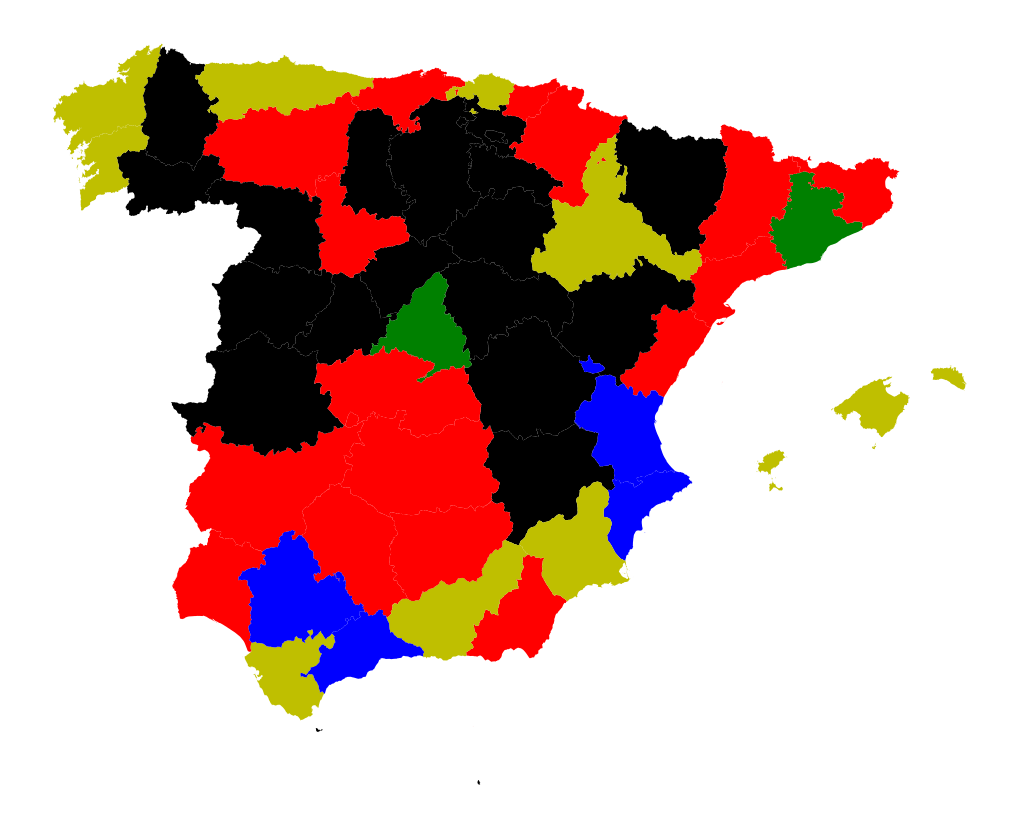

In [184]:
fig, ax = plt.subplots(1, figsize=(20, 15))
mergeGDF.plot(ax = ax, color=mergeGDF['color'])
ax.set_axis_off()
plt.show()